Data Mining [H02C6a] - Spring 2023

# Gradient Boosting

![Gradient Boosting](gbt_pic.png)
Gradient Boosting is arguably one of the most commonly used machine learning algorithm. 

In this exercise, you will implement a very naive version of gradient boosted trees for solving regression tasks.

## Introduction

**Question 1.1:** What is boosting? What other ensembling tecnhiques are you familiar with?

**Question 1.2:** What is the idea behind gradient boosting? What does <i>'gradient'</i> in its title refer to?

Hint: if you do not know anything about gradient boosting yet, try reading the following article:
http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html

## Gradient Boosting from scratch

**Question 2.1** Complete the skeleton code below to get the very basic implementation of the gradient tree boosting algorithm.

In [1]:
import numpy as np
from sklearn.tree import *

In [2]:
class myGBR():
    def __init__(self, max_num_iter = 50, max_depth = 5, learning_rate = 0.2):
        self.max_num_iter = max_num_iter
        self.max_depth = max_depth
        self.learning_rate = learning_rate
        return
    
    def fit(self, X, y):
        self.init_est = np.mean(y)
        y_pred = self.init_est
        
        self.trees = []
        
        for i in range(self.max_num_iter):

            residuals = y-y_pred

            dt = DecisionTreeRegressor(max_depth=self.max_depth)
            dt.fit(X,residuals)
            self.trees.append(dt)
            
            y_pred += self.learning_rate*dt.predict(X)
            
    def predict(self, X):
        y_pred = self.init_est + self.learning_rate*np.sum(np.array([dt.predict(X) for dt in self.trees]), axis=0)
        return y_pred

## Experiments

It is now time to experiment with your learner. We will use the standard California housing prices dataset which can be loaded directly from sklearn.

In [3]:
# Read the data
from sklearn.datasets import *
data = fetch_california_housing()
X = data.data
y = data.target

In [4]:
# Split the data in train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [5]:
def mse (y,y_pred):
    return np.mean((y-y_pred)**2)

Let's see how well our model performs on the test set

In [6]:
gbr = myGBR(max_num_iter = 50, max_depth = 5, learning_rate = 0.2)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)
mse(y_test, y_pred)

0.2439470533131402

**Question 3.1** How does that compare to other algorithms (e.g., single regression tree, Random Forest, ...)?

In [7]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)
mse(y_test, y_pred)

0.537298412589593

In [8]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
mse(y_test, y_pred)

0.25426650716858645

**Question 3.2** What are the effects of different model parameters (learning rate, number of iterations,...) on the performance?

Effect of *max_num_iter* :

In [9]:
m_iter_mse = []
iter_val = np.arange(10,210,10)
for m_iter in iter_val:
    gbr = myGBR(max_num_iter = m_iter, max_depth = 5, learning_rate = 0.2)
    gbr.fit(X_train, y_train)
    m_iter_mse.append(mse(y_test, gbr.predict(X_test)))

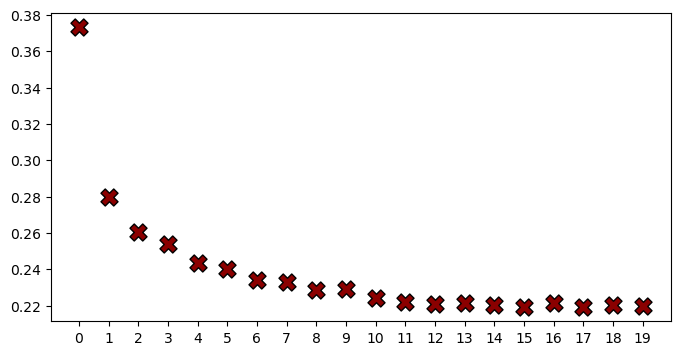

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,4))
plt.scatter(np.arange(0,len(iter_val)), m_iter_mse, marker = 'X', s = 150, c = 'darkred', edgecolors = 'black')
plt.xticks(np.arange(0,len(iter_val)),np.arange(0,len(iter_val)))
plt.show()

Effect of *max_depth* :

In [11]:
m_depth_mse = []
depts_val = np.arange(2,42,2)
for m_depth in depts_val:
    gbr = myGBR(max_num_iter = 50, max_depth = m_depth, learning_rate = 0.2)
    gbr.fit(X_train, y_train)
    m_depth_mse.append(mse(y_test, gbr.predict(X_test)))

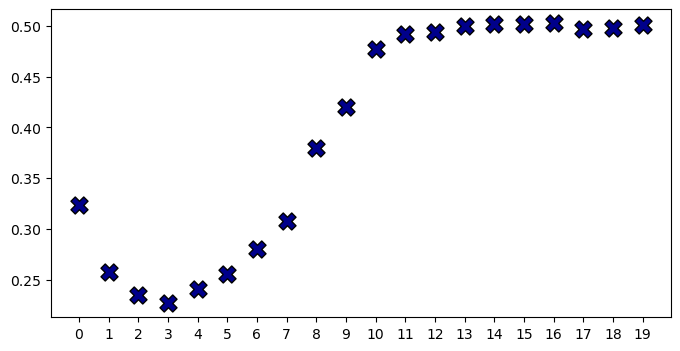

In [12]:
plt.figure(figsize = (8,4))
plt.scatter(np.arange(0,len(m_depth_mse)), m_depth_mse, marker = 'X', s = 150, 
            c = 'darkblue', edgecolors = 'black')
plt.xticks(np.arange(0,len(m_depth_mse)),np.arange(0,len(m_depth_mse)))
plt.show()

Effect of *learning_rate* :

In [13]:
l_rate_mse = []
rate_val = np.arange(0.01,1,0.05)
for l_rate in rate_val:
    gbr = myGBR(max_num_iter = 50, max_depth = 5, learning_rate = l_rate)
    gbr.fit(X_train, y_train)
    l_rate_mse.append(mse(y_test, gbr.predict(X_test)))

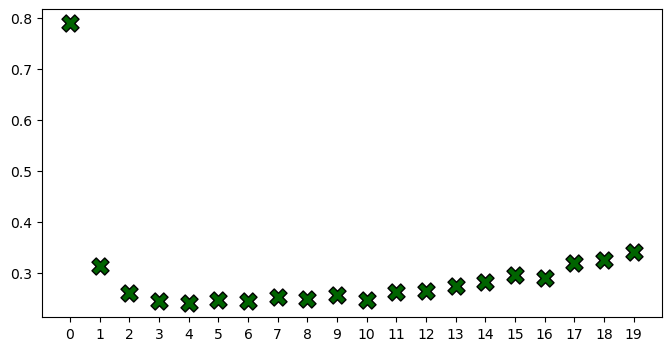

In [14]:
plt.figure(figsize = (8,4))
plt.scatter(np.arange(0,len(l_rate_mse)), l_rate_mse, marker = 'X', s = 150, 
            c = 'darkgreen', edgecolors = 'black')
plt.xticks(np.arange(0,len(l_rate_mse)),np.arange(0,len(l_rate_mse)))
plt.show()